In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Import Data

In [2]:
#import data
data = pd.read_csv (r'C:\Users\sshen\OneDrive - KNEX\Desktop\Case Study\DSA Data Set.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


### Overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


### Current Model Evaluation

In [5]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
y_yes = data[data['y']=='yes']

In [7]:
y_yes.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,0.736021
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641,0.195098
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000,0.576202
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000,0.792657
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000,0.935985
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.981402


In [8]:
data['y'] = data['y'].replace('yes', 1)
data['y'] = data['y'].replace('no', 0)

In [9]:
#evaluate perfomance
data.groupby('y')['ModelPrediction'].mean()

y
0    0.906841
1    0.736021
Name: ModelPrediction, dtype: float64

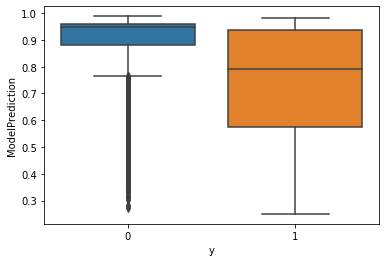

In [10]:
df_ModelPrediction = data[['ModelPrediction','y']]
sns.boxplot(x = 'y',y = 'ModelPrediction', data = df_ModelPrediction)

In [11]:
#confusion matrix, threshold = 0.90
data.loc[data['ModelPrediction'] >= 0.90, 'y_pred1'] = 1
data.loc[data['ModelPrediction'] < 0.90, 'y_pred1'] = 0
confusion_matrix(data['y'],data['y_pred1'])

array([[ 9966, 26582],
       [ 3282,  1358]], dtype=int64)

In [12]:
#confusion matrix, threshold = 0.95 
data.loc[data['ModelPrediction'] >= 0.95, 'y_pred2'] = 1
data.loc[data['ModelPrediction'] < 0.95, 'y_pred2'] = 0
confusion_matrix(data['y'],data['y_pred2'])

array([[19465, 17083],
       [ 3733,   907]], dtype=int64)

<Figure size 432x288 with 0 Axes>

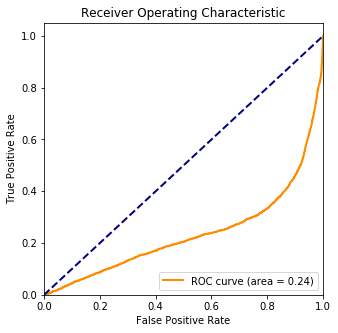

In [13]:
#Roc curve
fpr,tpr,thresholds = roc_curve(data['y'],data['ModelPrediction'])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
data=data.drop('y_pred1',axis=1)
data=data.drop('y_pred2',axis=1)

### Data Exploration and Data Clean

In [16]:
#visualization
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')

<Figure size 360x360 with 0 Axes>

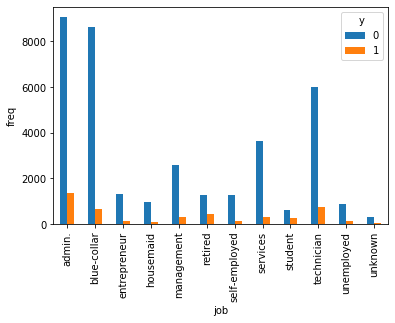

<Figure size 360x360 with 0 Axes>

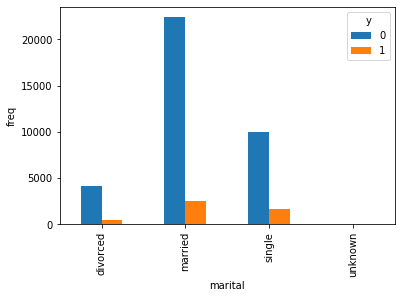

<Figure size 360x360 with 0 Axes>

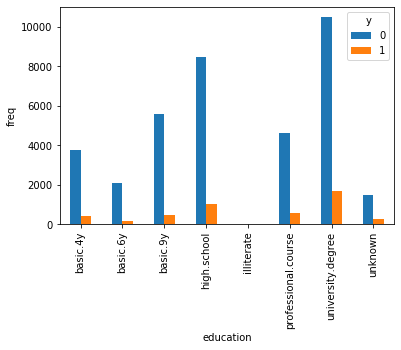

<Figure size 360x360 with 0 Axes>

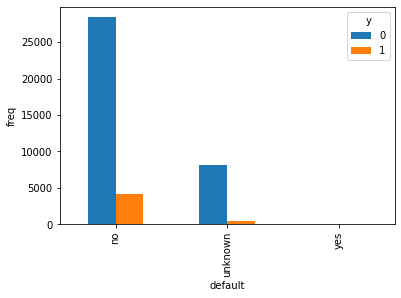

<Figure size 360x360 with 0 Axes>

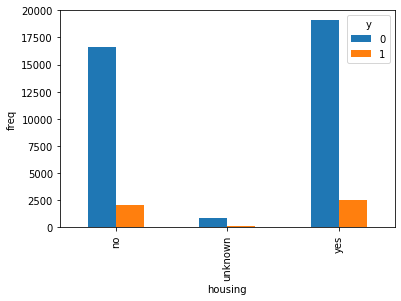

<Figure size 360x360 with 0 Axes>

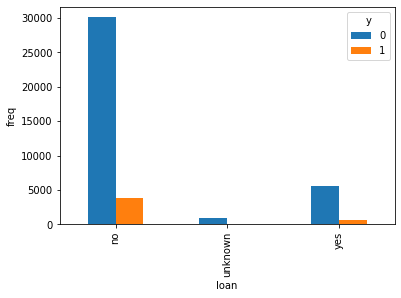

<Figure size 360x360 with 0 Axes>

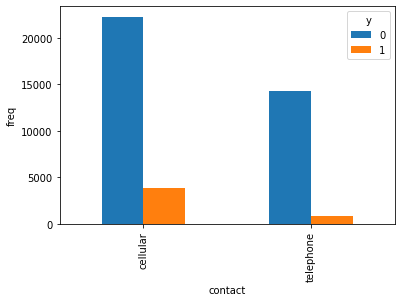

<Figure size 360x360 with 0 Axes>

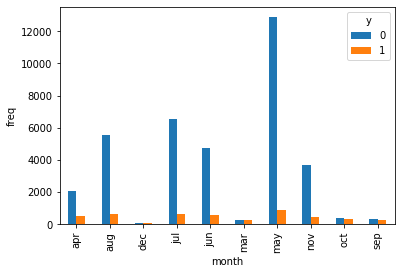

<Figure size 360x360 with 0 Axes>

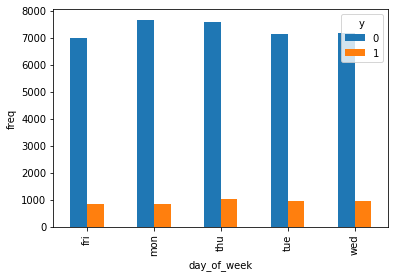

<Figure size 360x360 with 0 Axes>

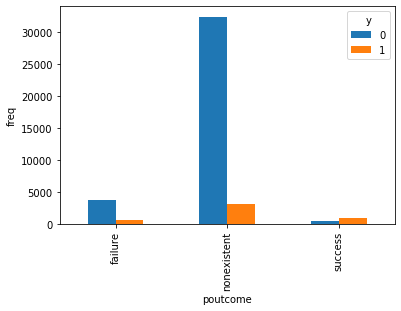

In [17]:
categorical_feature =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for f in categorical_feature:
    datacol = data[f]
    plt.figure(figsize = (5,5))
    pd.crosstab(data[f],data['y']).plot(kind='bar')
    plt.xlabel(f)
    plt.ylabel('freq')
    plt.show()

In [18]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [20]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [21]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [22]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [23]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [15]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
y,,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.906841
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,0.736021


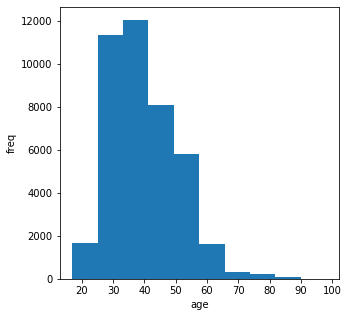

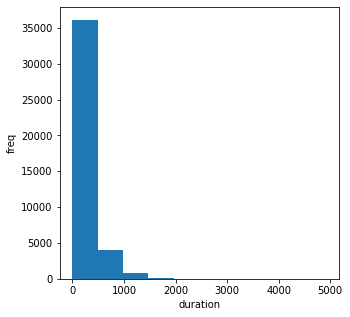

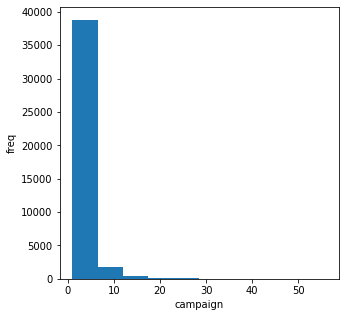

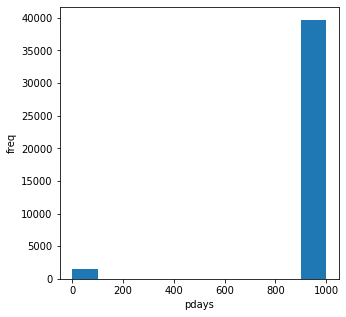

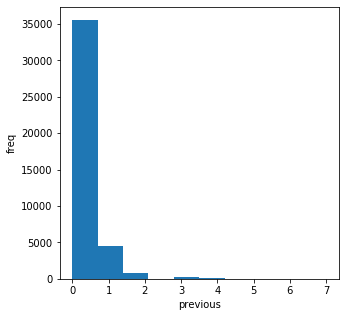

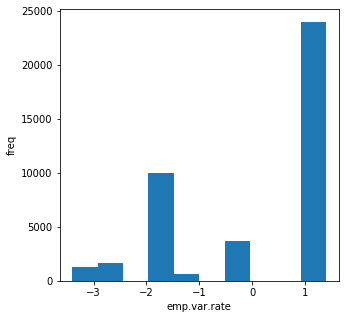

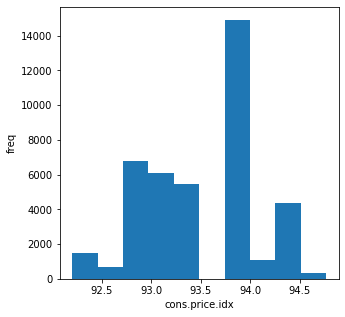

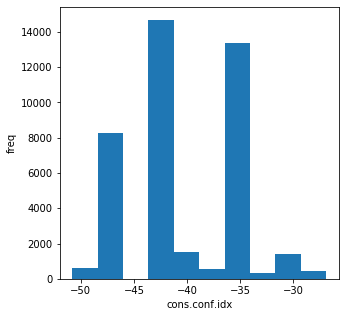

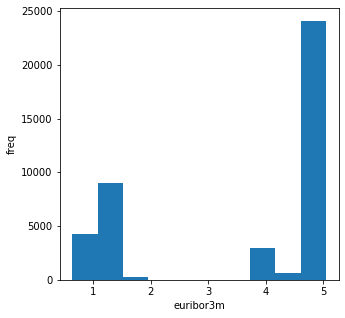

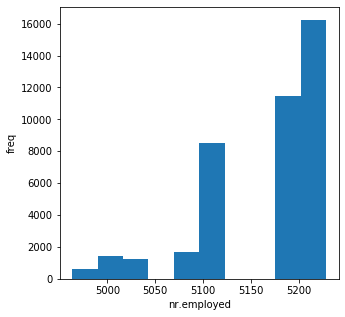

In [24]:
numerical_feature =  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for f in numerical_feature:
    datacol = data[f]
    plt.figure(figsize = (5,5))
    plt.hist(datacol)
    plt.xlabel(f)
    plt.ylabel('freq')
    plt.show()

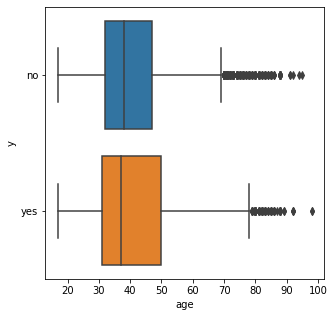

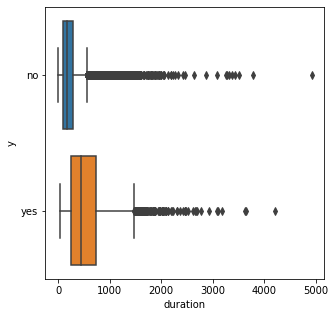

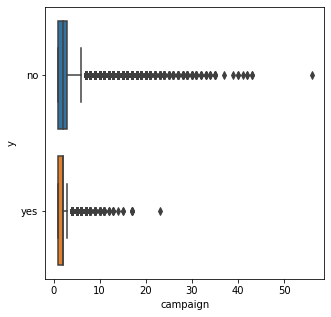

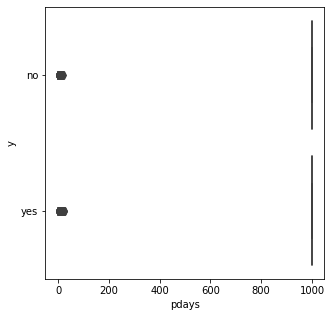

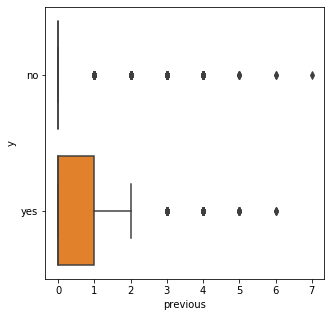

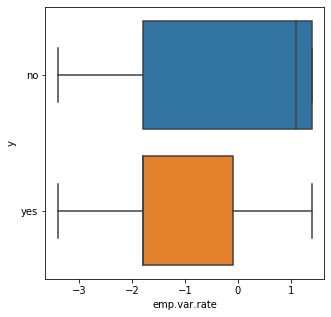

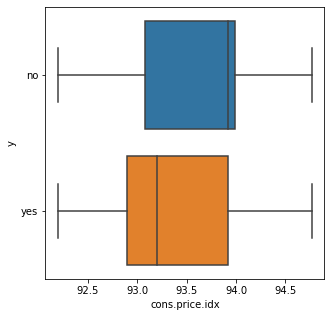

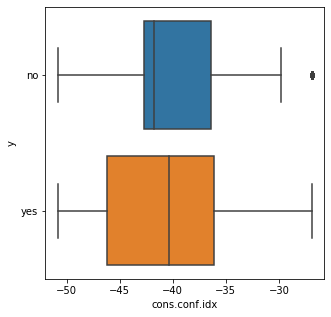

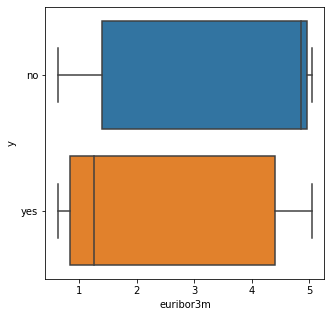

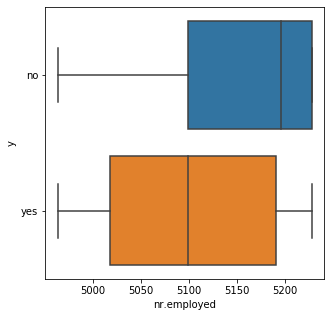

In [37]:
#Run before y changed into dummy
for f in numerical_feature:
    plt.figure(figsize = (5,5))
    numerical_boxplt = data[['y',f]]
    sns.boxplot(x = f,y = 'y' , data = numerical_boxplt)
    plt.show()

In [25]:
cat_feature =  ['job', 'marital', 'default', 'housing', 'loan', 'month','poutcome','day_of_week']

In [26]:
data=data.drop('duration',axis=1)
data=data.drop('ModelPrediction',axis=1)

In [27]:
data['contact'] = data['contact'].replace('telephone', 1)
data['contact'] = data['contact'].replace('cellular', 0)

In [28]:
dict1 = {'illiterate':1,'basic.4y':2,'basic.6y':3, 'basic.9y':4, 'high.school':5,'professional.course':6,'university.degree':7,'unknown':4}
data['education'] = data['education'].map(dict1)

In [30]:
data['job'] = data['job'].replace('unknown', np.NAN)
data['marital'] = data['marital'].replace('unknown', np.NAN)
data = data.dropna()

In [32]:
#create dummy variables
for i in cat_feature:
    dummies = pd.get_dummies(data[i])
    dummies = dummies.rename(columns = lambda x:i+'_'+str(x))
    data = pd.concat([data,dummies], axis=1)
    data = data.drop(i,axis = 1)

### New Model

In [33]:
data.columns

Index(['age', 'education', 'contact', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

In [34]:
vif_cols= ['age', 'education', 'contact', 'campaign','pdays','previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed','job_services', 'job_student', 'job_technician', 'marital_married', 'marital_single', 'default_no', 'default_yes','housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr', 'month_aug','month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov','month_oct', 'month_sep', 'poutcome_failure','poutcome_success','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

In [35]:
V = data[vif_cols]

In [36]:
def calc_vif(V):
    vif = pd.DataFrame()
    vif["variables"] = V.columns
    vif["VIF"] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]
    return(vif)

In [37]:
calc_vif(V)

C:\Users\sshen\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,age,2.621360e+01
1,education,1.935567e+01
2,contact,5.144006e+00
3,campaign,1.940040e+00
4,pdays,3.409645e+02
5,previous,6.643444e+00
6,emp.var.rate,9.403811e+01
7,cons.price.idx,6.415136e+04
8,cons.conf.idx,3.907320e+02
9,euribor3m,7.903291e+02


In [38]:
#drop 'house_no' ,'loan_no'
vif_cols= ['age', 'education', 'contact', 'campaign','pdays','previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed','job_services', 'job_student', 'job_technician', 'marital_married', 'marital_single', 'default_no', 'default_yes', 'housing_yes','loan_yes', 'month_apr', 'month_aug','month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov','month_oct', 'month_sep', 'poutcome_failure','poutcome_success','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

In [39]:
V = data[vif_cols]
calc_vif(V)

,variables,VIF
0,age,26.213347
1,education,19.355592
2,contact,5.143999
3,campaign,1.940040
4,pdays,340.961106
5,previous,6.643374
6,emp.var.rate,94.036615
7,cons.price.idx,64147.601069
8,cons.conf.idx,390.718797
9,euribor3m,790.275185


In [40]:
#drop 'cons.price.idx','nr.emloyed'
vif_cols= ['age', 'education', 'contact', 'campaign','pdays','previous','emp.var.rate', 'cons.conf.idx', 'euribor3m', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed','job_services', 'job_student', 'job_technician', 'marital_married', 'marital_single', 'default_no', 'default_yes', 'housing_yes', 'loan_yes', 'month_apr', 'month_aug','month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov','month_oct', 'month_sep', 'poutcome_failure','poutcome_success','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

In [41]:
V = data[vif_cols]
calc_vif(V)

,variables,VIF
0,age,24.967469
1,education,19.029621
2,contact,4.579158
3,campaign,1.933276
4,pdays,255.389395
5,previous,5.904839
6,emp.var.rate,25.694096
7,cons.conf.idx,160.270503
8,euribor3m,150.478022
9,job_admin.,11.288818


In [42]:
#drop 'pdays','cons.conf.idx'
vif_cols= ['age', 'education', 'contact', 'campaign','previous','emp.var.rate', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed','job_services', 'job_student', 'job_technician', 'marital_married', 'marital_single', 'default_no', 'default_yes', 'housing_yes', 'loan_yes', 'month_apr', 'month_aug','month_jul', 'month_jun', 'month_mar', 'month_nov','month_oct', 'month_sep', 'poutcome_failure','poutcome_success','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

In [43]:
V = data[vif_cols]
calc_vif(V)

,variables,VIF
0,age,17.982994
1,education,16.016030
2,contact,3.685175
3,campaign,1.916343
4,previous,5.380995
5,emp.var.rate,2.651738
6,job_admin.,8.451245
7,job_blue-collar,6.304910
8,job_entrepreneur,2.013619
9,job_housemaid,1.690311


In [44]:
#drop 'age','education'
vif_cols= ['contact', 'campaign','previous','emp.var.rate', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed','job_services', 'job_student', 'job_technician', 'marital_married', 'marital_single', 'default_no', 'default_yes', 'housing_yes', 'loan_yes', 'month_apr', 'month_aug','month_jul', 'month_jun', 'month_mar', 'month_nov','month_oct', 'month_sep', 'poutcome_failure','poutcome_success','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

In [45]:
V = data[vif_cols]
calc_vif(V)

,variables,VIF
0,contact,3.535185
1,campaign,1.902486
2,previous,5.380573
3,emp.var.rate,2.625583
4,job_admin.,5.083902
5,job_blue-collar,4.344587
6,job_entrepreneur,1.560472
7,job_housemaid,1.391767
8,job_management,2.140295
9,job_retired,1.675514


In [46]:
X = data[vif_cols]
y = data['y']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [49]:
logit_model = sm.Logit(y_train,X_train)
logreg = logit_model.fit()
print(logreg.summary())

         Current function value: 0.281536
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28550
Model:                          Logit   Df Residuals:                    28515
Method:                           MLE   Df Model:                           34
Date:                Tue, 08 Sep 2020   Pseudo R-squ.:                  0.2020
Time:                        17:24:27   Log-Likelihood:                -8037.8
converged:                      False   LL-Null:                       -10073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.9398      0.167    -17.622      0.000      -3.267      -2.613
contact              -0.2656      0.063     

C:\Users\sshen\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [50]:
#drop insignificant variables
vif_cols2= ['contact', 'campaign','previous','emp.var.rate', 'job_retired', 'default_no', 'month_apr', 'month_aug','month_jul', 'month_jun', 'month_mar','month_oct', 'month_sep', 'poutcome_failure','poutcome_success','day_of_week_mon']

In [51]:
X = data[vif_cols2]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [52]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [53]:
logit_model2=sm.Logit(y_train,X_train)
logreg2=logit_model2.fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.282429
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28550
Model:                          Logit   Df Residuals:                    28533
Method:                           MLE   Df Model:                           16
Date:                Tue, 08 Sep 2020   Pseudo R-squ.:                  0.1995
Time:                        17:25:14   Log-Likelihood:                -8063.3
converged:                       True   LL-Null:                       -10073.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.9299      0.077    -38.276      0.000      -3.080      -2.780
contact    

In [54]:
y_pred = logreg2.predict(X_test)

<Figure size 432x288 with 0 Axes>

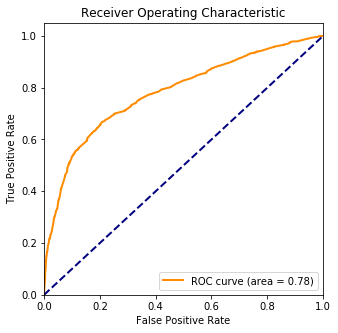

In [55]:
#Roc curve
fpr,tpr,thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()